In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")


In [2]:
df=pd.read_csv("Temparature.csv")
df

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
0         1.0  30-06-2013          28.7          21.4    58.255688   
1         2.0  30-06-2013          31.9          21.6    52.263397   
2         3.0  30-06-2013          31.6          23.3    48.690479   
3         4.0  30-06-2013          32.0          23.4    58.239788   
4         5.0  30-06-2013          31.4          21.9    56.174095   
...       ...         ...           ...           ...          ...   
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
0       91.116364         28.074101         23.006936   6.818887   69.451805   
1       90.604721         29.850689         24.035009   5.691890   51.937448   
2       83.973587         30.091292         24.565633   6.138224   20.573050   
3       96.483688         29.704629         23.326177   5.650050   65.727144   
4       90.155128         29.113934         23.486480   5.735004  107.965535   
...           ...               ...               ...        ...         ...   
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
0     ...    0.000000    0.000000    0.000000  37.6046  126.991  212.3350   
1     ...    0.000000    0.000000    0.000000  37.6046  127.032   44.7624   
2     ...    0.000000    0.000000    0.000000  37.5776  127.058   33.3068   
3     ...    0.000000    0.000000    0.000000  37.6450  127.022   45.7160   
4     ...    0.000000    0.000000    0.000000  37.5507  127.135   35.0380   
...   ...         ...         ...         ...      ...      ...       ...   
7747  ...    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748  ...    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749  ...    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750  ...    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751  ...   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
0     2.785000      5992.895996       29.1       21.2  
1     0.514100      5869.312500       30.5       22.5  
2     0.266100      5863.555664       31.1       23.9  
3     2.534800      5856.964844       31.7       24.3  
4     0.505500      5859.552246       31.2       22.5  
...        ...              ...        ...        ...  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[7752 rows x 25 columns]

The given data set contail two target variable  Next_Tmax and Next_Tmin

In [3]:
df.shape

(7752, 25)

In [4]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

Most of the data has missing values and need to be tretaed 

In [5]:
df['Date'].fillna(df['Date'].mode()[0], inplace = True)

In [6]:
for i in df.columns:
    if df[i].dtypes=="float":
        df[i].replace(np.NaN,df[i].mean(), inplace = True)

In [7]:
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

Removed all NAN value

In [8]:
df["date"]=pd.to_datetime(df.Date,format="%d-%m-%Y").dt.day
df["Month"]=pd.to_datetime(df.Date,format="%d-%m-%Y").dt.month
df["Year"]=pd.to_datetime(df.Date,format="%d-%m-%Y").dt.year
df.drop(["Date"],axis=1,inplace=True)

In [9]:
df.head()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0          28.7          21.4    58.255688    91.116364   
1      2.0          31.9          21.6    52.263397    90.604721   
2      3.0          31.6          23.3    48.690479    83.973587   
3      4.0          32.0          23.4    58.239788    96.483688   
4      5.0          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  ...  \
0         28.074101         23.006936  6.818887   69.451805   0.233947  ...   
1         29.850689         24.035009  5.691890   51.937448   0.225508  ...   
2         30.091292         24.565633  6.138224   20.573050   0.209344  ...   
3         29.704629         23.326177  5.650050   65.727144   0.216372  ...   
4         29.113934         23.486480  5.735004  107.965535   0.151407  ...   

       lat      lon       DEM   Slope  Solar radiation  Next_Tmax  Next_Tmin  \
0  37.6046  126.991  212.3350  2.7850      5992.895996       29.1       21.2   
1  37.6046  127.032   44.7624  0.5141      5869.312500       30.5       22.5   
2  37.5776  127.058   33.3068  0.2661      5863.555664       31.1       23.9   
3  37.6450  127.022   45.7160  2.5348      5856.964844       31.7       24.3   
4  37.5507  127.135   35.0380  0.5055      5859.552246       31.2       22.5   

   date  Month  Year  
0    30      6  2013  
1    30      6  2013  
2    30      6  2013  
3    30      6  2013  
4    30      6  2013  

[5 rows x 27 columns]

Since date is a ordinal value and changed as Integer

In [10]:
df.columns

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'date', 'Month', 'Year'],
      dtype='object')

In [11]:
for i in df.columns:
        print(str(i))
        print(df[i].value_counts())
        print("\n")

station
13.0    312
12.0    310
2.0     310
3.0     310
4.0     310
5.0     310
6.0     310
7.0     310
8.0     310
9.0     310
10.0    310
11.0    310
25.0    310
23.0    310
14.0    310
15.0    310
16.0    310
18.0    310
20.0    310
22.0    310
24.0    310
17.0    310
19.0    310
21.0    310
1.0     310
Name: station, dtype: int64


Present_Tmax
31.4    112
29.4    111
29.1    108
29.7    107
30.6    105
       ... 
20.1      1
36.4      1
20.4      1
36.9      1
37.1      1
Name: Present_Tmax, Length: 168, dtype: int64


Present_Tmin
24.0    161
23.8    153
23.1    144
23.5    143
23.3    142
       ... 
15.0      1
14.1      1
14.2      1
29.6      1
13.6      1
Name: Present_Tmin, Length: 156, dtype: int64


LDAPS_RHmin
56.759372    75
98.524734     2
19.794666     2
51.810596     2
77.030350     2
             ..
44.005089     1
58.655628     1
58.761993     1
42.186558     1
71.359451     1
Name: LDAPS_RHmin, Length: 7673, dtype: int64


LDAPS_RHmax
88.374804    75
58.936283   

In [12]:
df.corr()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
station           1.000000e+00      0.112655      0.131646    -0.066733   
Present_Tmax      1.126554e-01      1.000000      0.618760    -0.204571   
Present_Tmin      1.316462e-01      0.618760      1.000000     0.123143   
LDAPS_RHmin      -6.673316e-02     -0.204571      0.123143     1.000000   
LDAPS_RHmax      -1.669845e-01     -0.301787     -0.015140     0.579141   
LDAPS_Tmax_lapse  6.910718e-02      0.570129      0.464151    -0.564580   
LDAPS_Tmin_lapse  1.047582e-01      0.623496      0.762993     0.089476   
LDAPS_WS          5.277000e-03     -0.121820     -0.034675     0.294361   
LDAPS_LH         -1.333566e-01      0.135463     -0.009258    -0.070858   
LDAPS_CC1         6.918787e-03     -0.311805      0.084447     0.613818   
LDAPS_CC2         3.396039e-03     -0.213791      0.090263     0.745443   
LDAPS_CC3         6.940187e-04     -0.144018     -0.002772     0.689679   
LDAPS_CC4         6.126001e-03     -0.140729     -0.044335     0.514075   
LDAPS_PPT1       -2.709482e-03     -0.109006      0.112845     0.262665   
LDAPS_PPT2       -8.249548e-03     -0.099449      0.068176     0.390967   
LDAPS_PPT3       -1.246113e-02     -0.120367     -0.046126     0.240642   
LDAPS_PPT4       -1.040127e-02     -0.099607     -0.062965     0.168595   
lat              -2.375015e-01     -0.052615     -0.078475     0.087099   
lon              -1.187044e-01      0.009020     -0.043461    -0.076237   
DEM              -2.558297e-01     -0.187121     -0.250275     0.102115   
Slope            -9.006090e-02     -0.105809     -0.146339     0.123744   
Solar radiation  -1.900100e-02     -0.025439      0.053578     0.244080   
Next_Tmax         1.079826e-01      0.610348      0.471806    -0.437898   
Next_Tmin         1.282934e-01      0.622741      0.796670     0.095019   
date              2.850282e-19     -0.141660     -0.105591    -0.063184   
Month             1.485726e-16      0.146012      0.087555    -0.189023   
Year              0.000000e+00      0.059904      0.037785    -0.002104   

                  LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  \
station             -0.166984          0.069107          0.104758  0.005277   
Present_Tmax        -0.301787          0.570129          0.623496 -0.121820   
Present_Tmin        -0.015140          0.464151          0.762993 -0.034675   
LDAPS_RHmin          0.579141         -0.564580          0.089476  0.294361   
LDAPS_RHmax          1.000000         -0.373404         -0.114143  0.135333   
LDAPS_Tmax_lapse    -0.373404          1.000000          0.654021 -0.311996   
LDAPS_Tmin_lapse    -0.114143          0.654021          1.000000 -0.130035   
LDAPS_WS             0.135333         -0.311996         -0.130035  1.000000   
LDAPS_LH             0.238579          0.048010         -0.134761  0.006711   
LDAPS_CC1            0.436652         -0.438439          0.010901  0.289445   
LDAPS_CC2            0.391330         -0.523619          0.047727  0.261090   
LDAPS_CC3            0.226957         -0.541327         -0.044018  0.242991   
LDAPS_CC4            0.130619         -0.429539         -0.080335  0.220533   
LDAPS_PPT1           0.268449         -0.111065          0.038056  0.152587   
LDAPS_PPT2           0.229050         -0.242122          0.000870  0.191886   
LDAPS_PPT3           0.134607         -0.188115         -0.088575  0.161684   
LDAPS_PPT4           0.117853         -0.160273         -0.094655  0.144085   
lat                  0.195798         -0.042093         -0.096257  0.036657   
lon                  0.025667          0.090666         -0.026701 -0.059466   
DEM                  0.177168         -0.178895         -0.195455  0.191053   
Slope                0.219599         -0.162332         -0.185849  0.171629   
Solar radiation      0.149261          0.047971          0.159975  0.121759   
Next_Tmax           -0.283738          0.827189          0.586983 -0.342729   
Next_Tmin           -0.071

<AxesSubplot:>

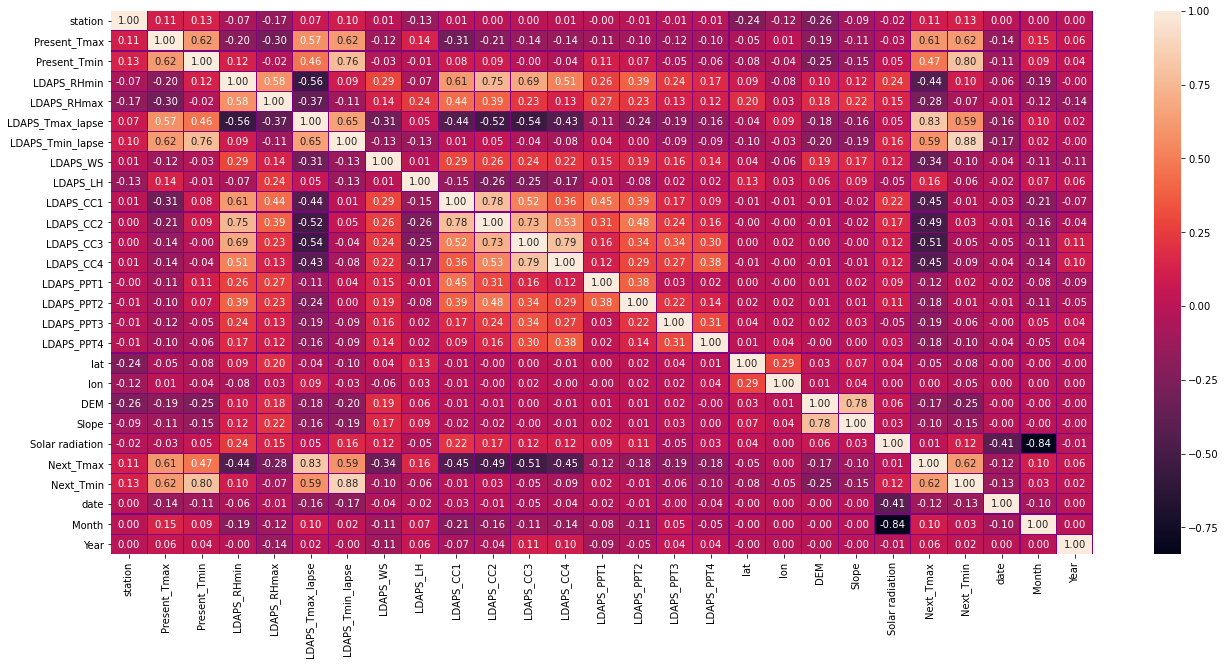

In [13]:
plt.figure(figsize=(22,10))
sb.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor="purple",fmt="0.2f")

We see lon and solar radiation has min correlation with Present_Tmax 

and  LDAPS_LH','LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1','LDAPS_PPT2', 'LDAPS_PPT3  min correlation with Present_Tmin

In [14]:
df.describe()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
count  7752.000000   7752.000000   7752.000000  7752.000000  7752.000000   
mean     13.000000     29.768211     23.225059    56.759372    88.374804   
std       7.210637      2.956557      2.403036    14.596973     7.157124   
min       1.000000     20.000000     11.300000    19.794666    58.936283   
25%       7.000000     27.800000     21.700000    46.046162    84.316923   
50%      13.000000     29.900000     23.400000    55.313244    89.699505   
75%      19.000000     32.000000     24.900000    67.038254    93.704500   
max      25.000000     37.600000     29.900000    98.524734   100.000153   

       LDAPS_Tmax_lapse  LDAPS_Tmin_lapse     LDAPS_WS     LDAPS_LH  \
count       7752.000000       7752.000000  7752.000000  7752.000000   
mean          29.613447         23.512589     7.097875    62.505019   
std            2.932898          2.333973     2.173245    33.567001   
min           17.624954         14.272646     2.882580   -13.603212   
25%           27.693091         22.114651     5.686487    37.532764   
50%           29.662273         23.735942     6.563068    57.310630   
75%           31.683819         25.134000     8.007471    83.904586   
max           38.542255         29.619342    21.857621   213.414006   

         LDAPS_CC1  ...          lat          lon          DEM        Slope  \
count  7752.000000  ...  7752.000000  7752.000000  7752.000000  7752.000000   
mean      0.368774  ...    37.544722   126.991397    61.867972     1.257048   
std       0.261185  ...     0.050352     0.079435    54.279780     1.370444   
min       0.000000  ...    37.456200   126.826000    12.370000     0.098475   
25%       0.148321  ...    37.510200   126.937000    28.700000     0.271300   
50%       0.320110  ...    37.550700   126.995000    45.716000     0.618000   
75%       0.571696  ...    37.577600   127.042000    59.832400     1.767800   
max       0.967277  ...    37.645000   127.135000   212.335000     5.178230   

       Solar radiation    Next_Tmax    Next_Tmin         date        Month  \
count      7752.000000  7752.000000  7752.000000  7752.000000  7752.000000   
mean       5341.502803    30.274887    22.932220    15.980005     7.467621   
std         429.158867     3.122557     2.483276     8.920743     0.530318   
min        4329.520508    17.400000    11.300000     1.000000     6.000000   
25%        4999.018555    28.200000    21.400000     8.000000     7.000000   
50%        5436.345215    30.500000    23.100000    16.000000     7.000000   
75%        5728.316406    32.600000    24.600000    24.000000     8.000000   
max        5992.895996    38.900000    29.800000    31.000000     8.000000   

              Year  
count  7752.000000  
mean   2014.999484  
std       1.414487  
min    2013.000000  
25%    2014.000000  
50%    2015.000000  
75%    2016.000000  
max    2017.000000  

[8 rows x 27 columns]

<AxesSubplot:>

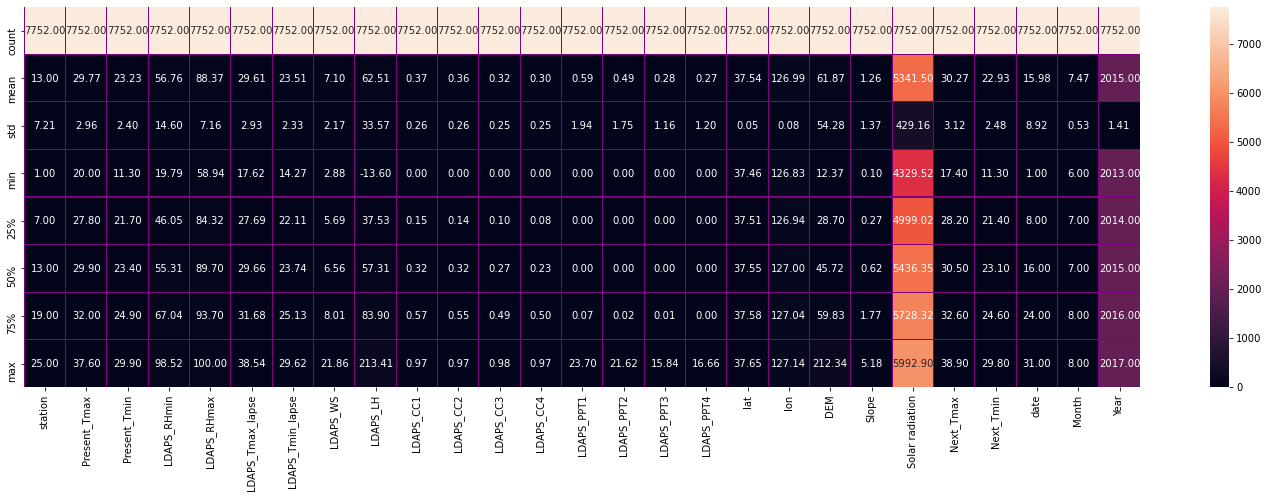

In [15]:
plt.figure(figsize=(25,7))
sb.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor="purple",fmt="0.2f")

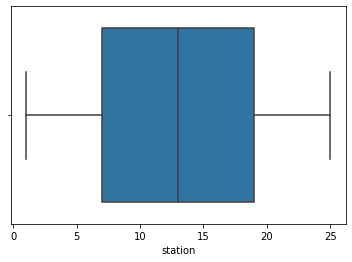

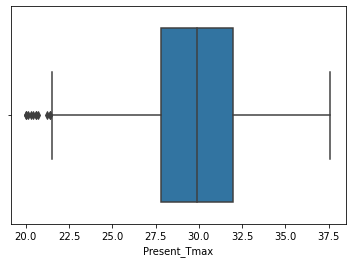

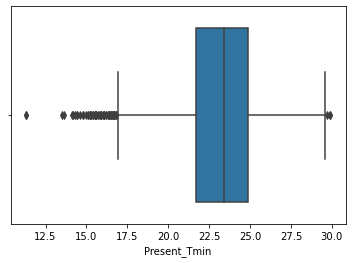

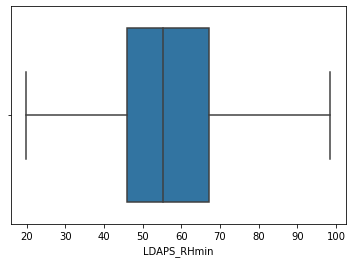

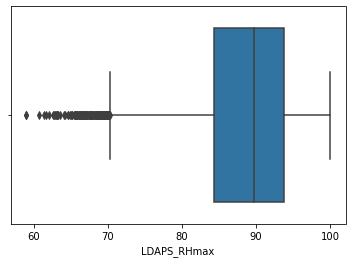

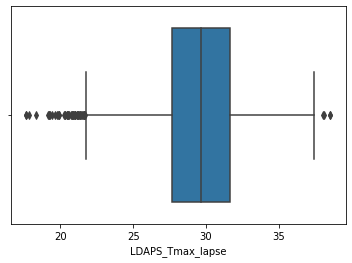

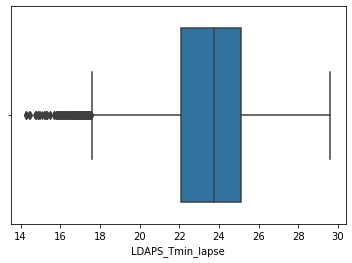

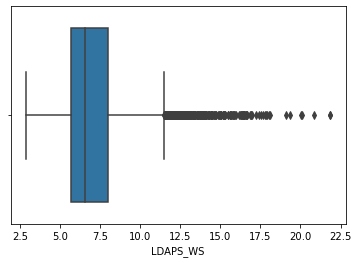

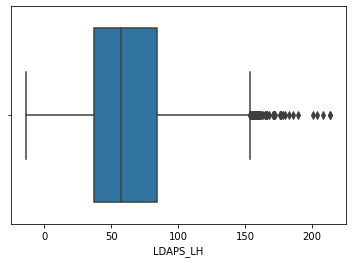

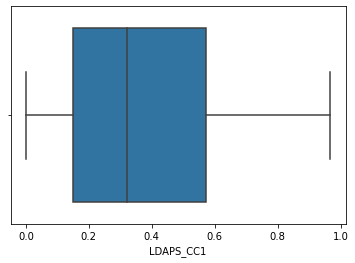

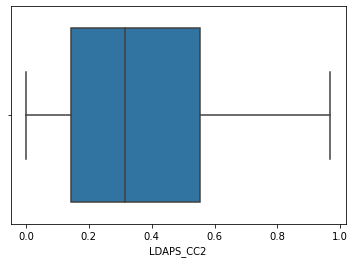

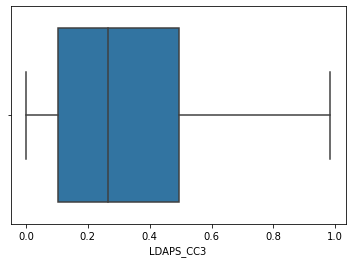

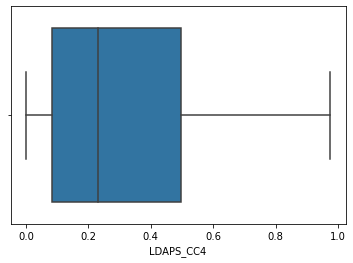

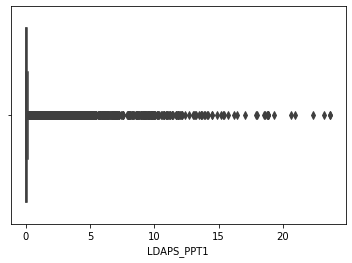

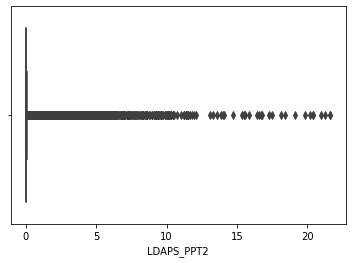

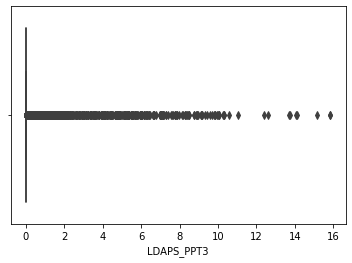

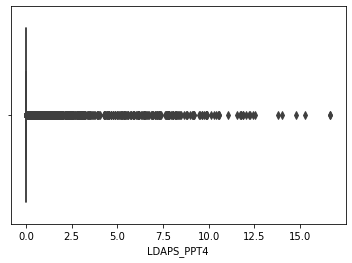

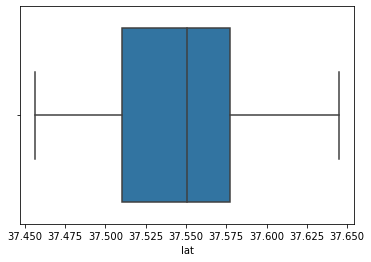

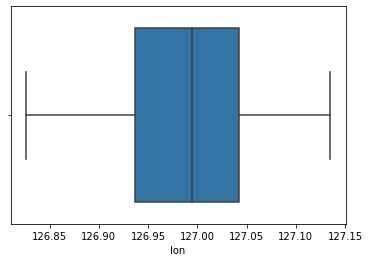

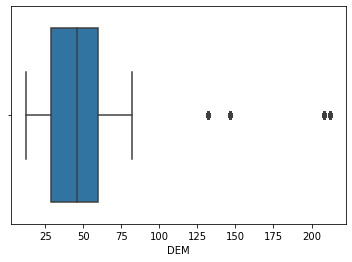

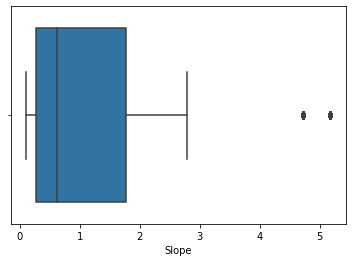

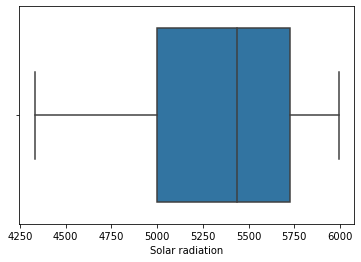

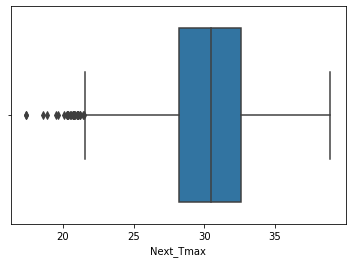

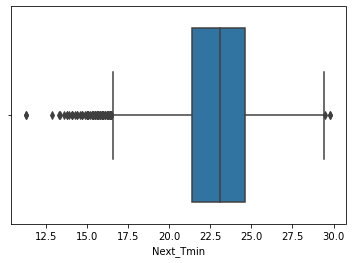

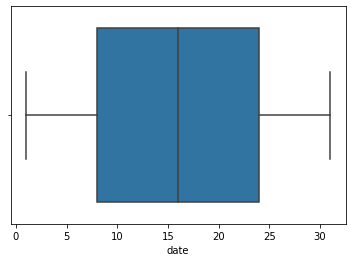

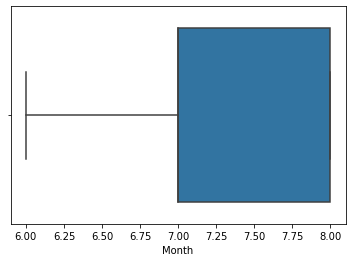

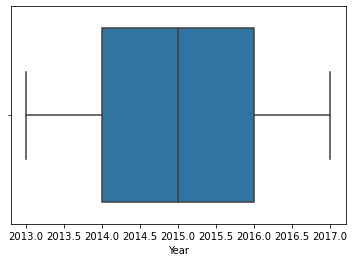

In [16]:
for  i in df.columns:
    plt.figure()
    sb.boxplot(df[i])

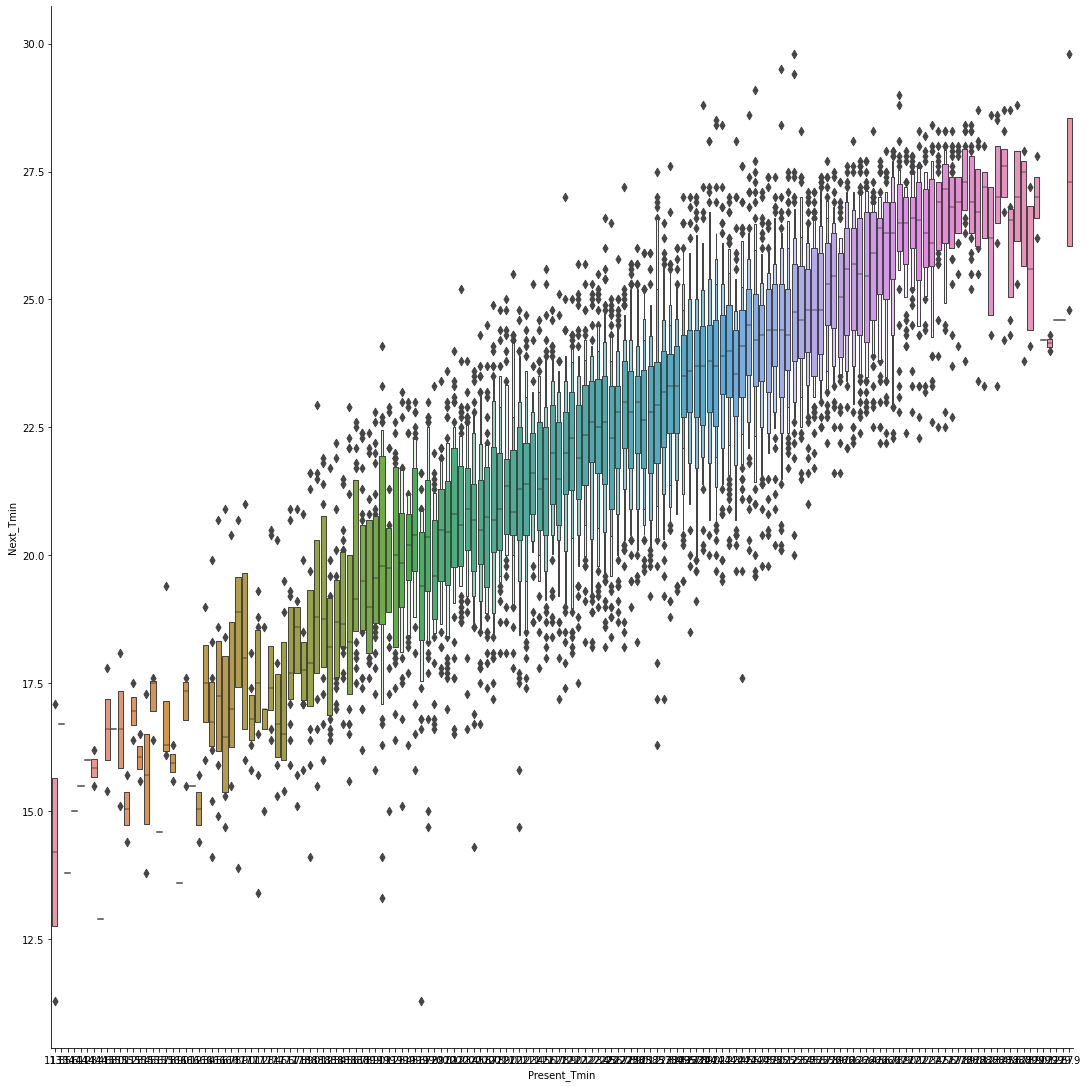

In [17]:
sb.catplot(y="Next_Tmin",x="Present_Tmin",data=df.sort_values("Next_Tmin", ascending= False), kind="boxen", height = 15, aspect = 1)

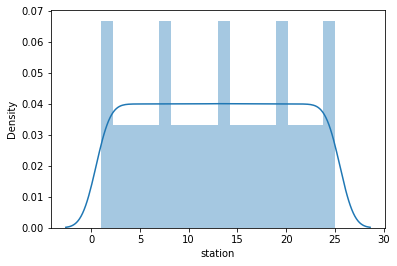

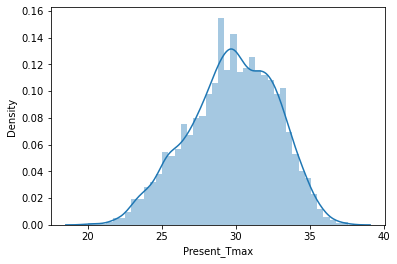

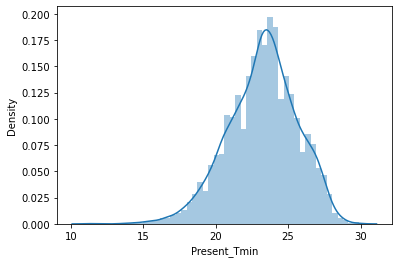

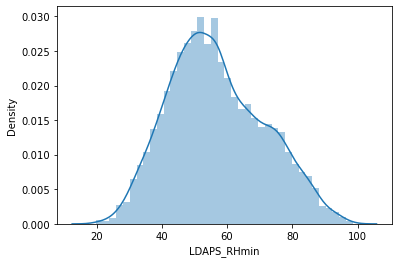

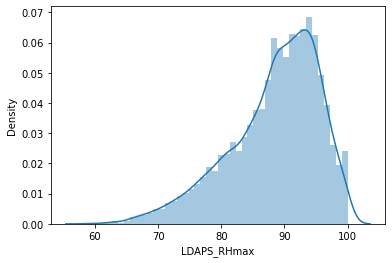

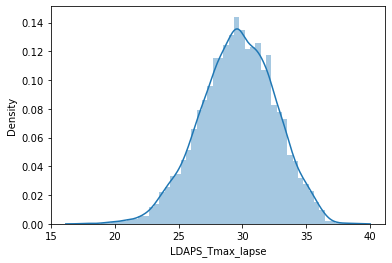

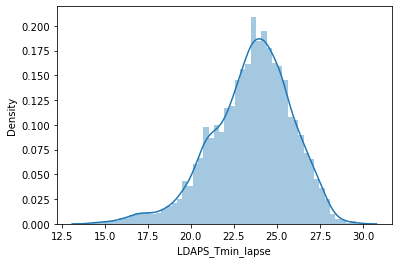

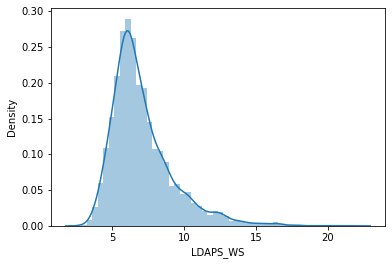

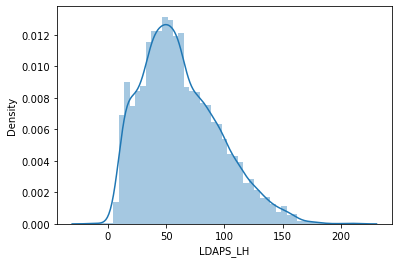

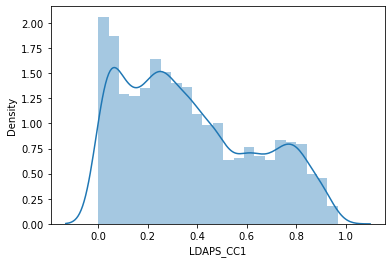

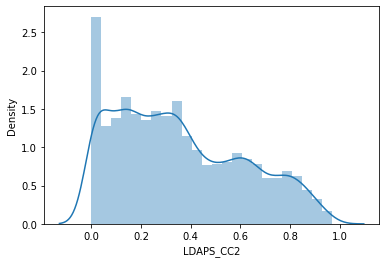

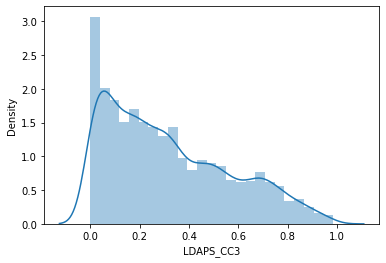

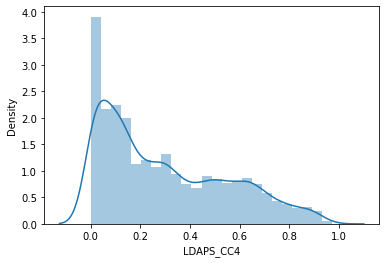

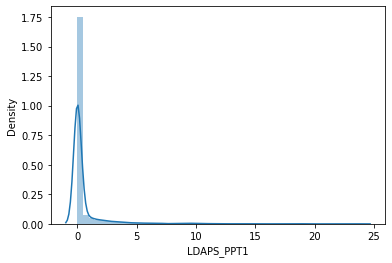

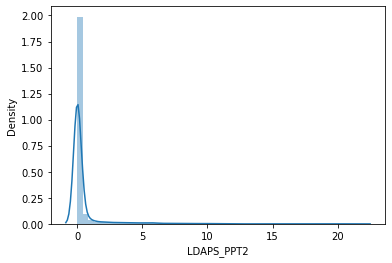

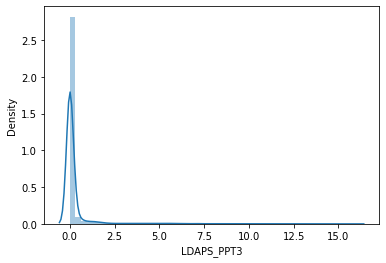

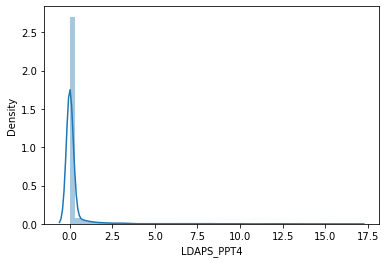

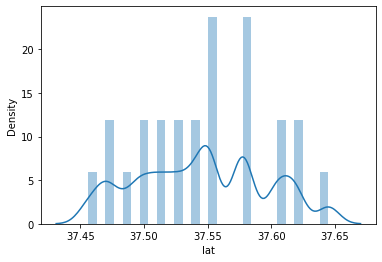

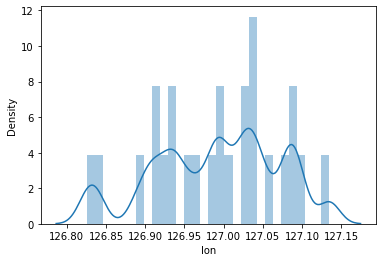

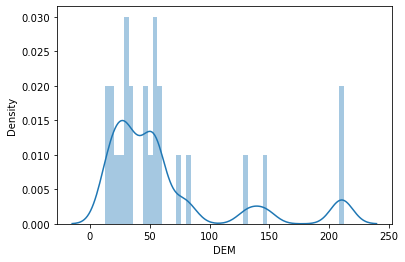

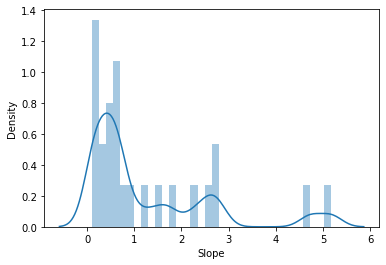

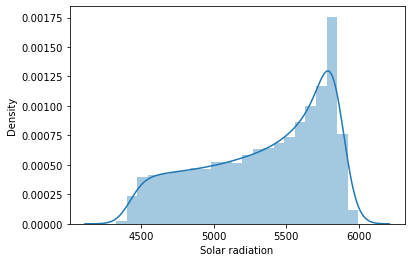

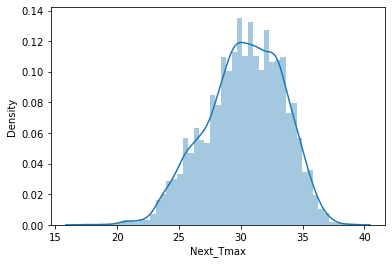

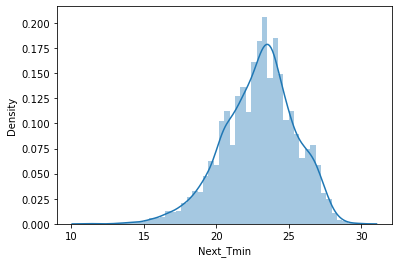

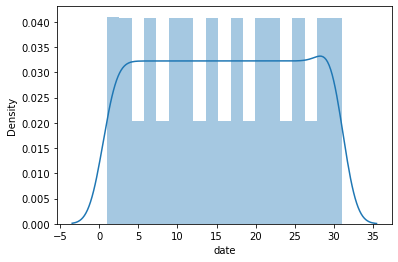

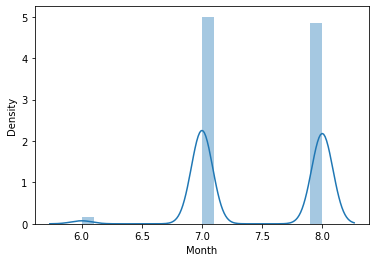

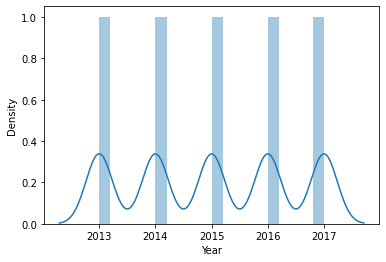

In [18]:
for  i in df.columns:
    plt.figure()
    sb.distplot(df[i])

In [19]:
df.columns

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'date', 'Month', 'Year'],
      dtype='object')

There are skewness present in the given data and need to be treated 



In [20]:

from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.6643153 , 0.36132577, 0.75952931, ..., 1.57171878, 2.76761252,
        1.41366644],
       [1.52562236, 0.72108401, 0.6762959 , ..., 1.57171878, 2.76761252,
        1.41366644],
       [1.38692941, 0.61960809, 0.03118815, ..., 1.57171878, 2.76761252,
        1.41366644],
       ...,
       [1.6643153 , 2.22171758, 2.42419767, ..., 1.57171878, 1.0039498 ,
        1.41439608],
       [0.        , 3.30412736, 4.9628169 , ..., 1.67934124, 0.88183136,
        1.41366644],
       [0.        , 2.64912642, 2.77789093, ..., 1.67934124, 0.88183136,
        1.41366644]])

In [21]:
threshold=3
print(np.where(z>3))

(array([  25,   25,   26, ..., 7751, 7751, 7751], dtype=int64), array([ 7, 14, 14, ..., 14, 15, 16], dtype=int64))


In [22]:
df_new=df[(z<3).all(axis=1)]

In [23]:
df_new.shape

(6894, 27)

In [24]:
df.shape

(7752, 27)

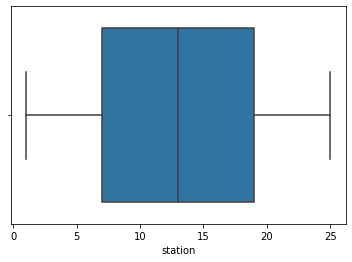

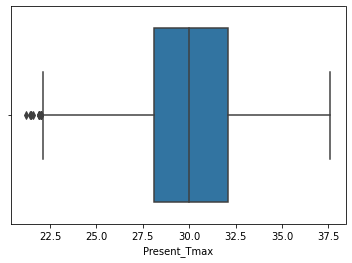

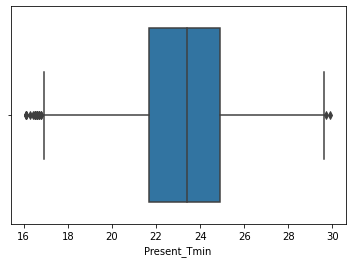

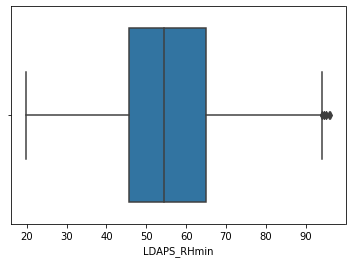

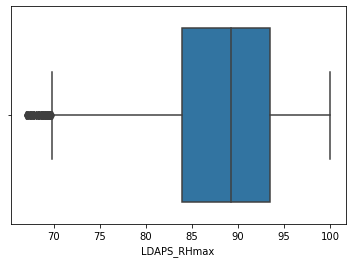

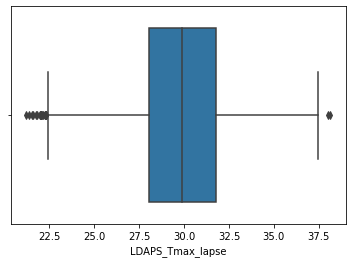

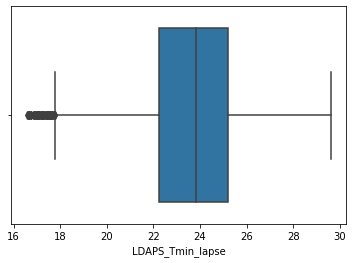

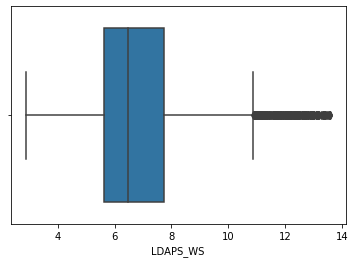

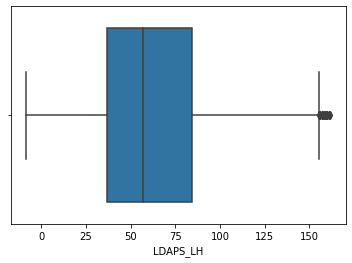

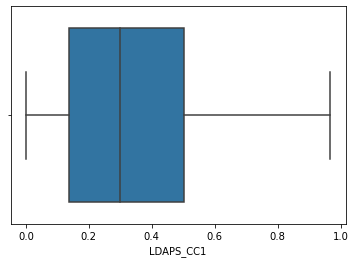

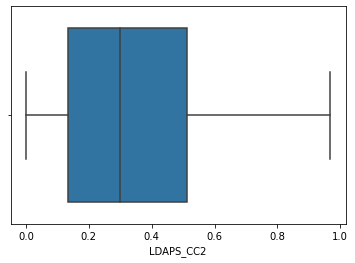

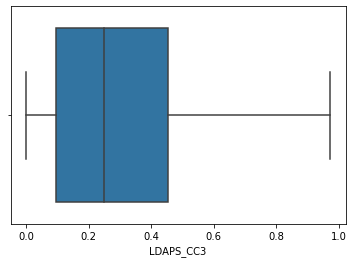

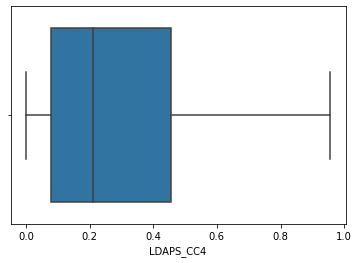

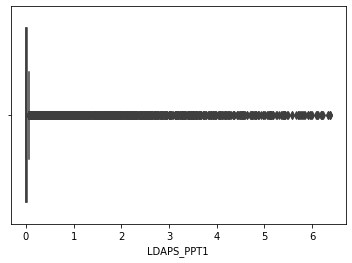

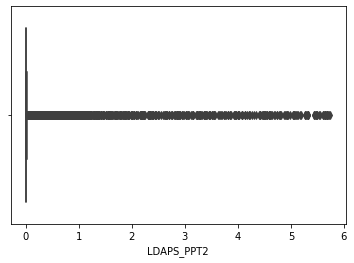

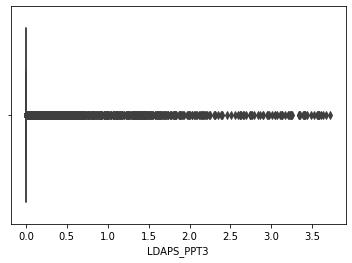

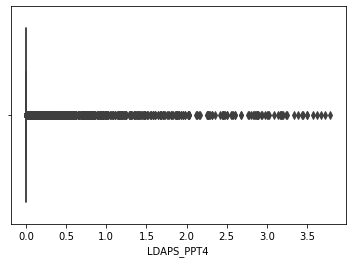

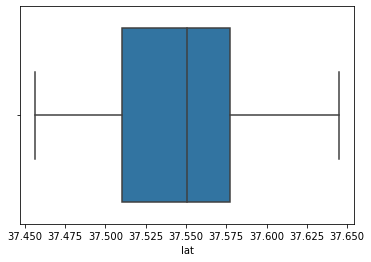

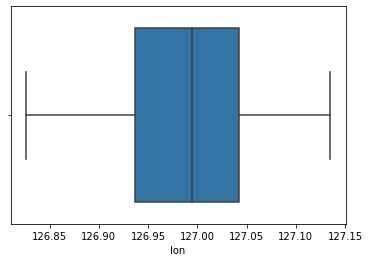

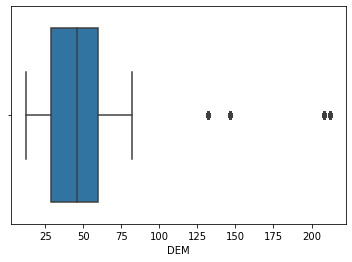

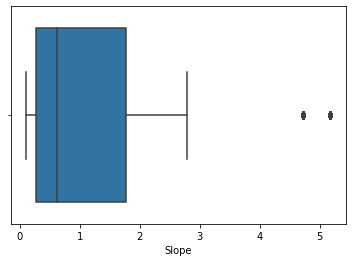

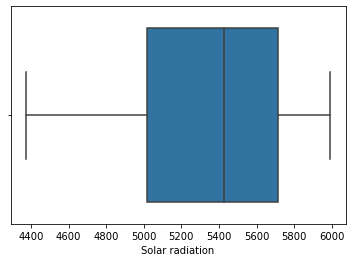

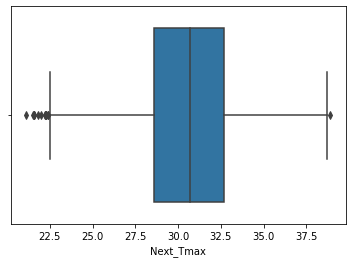

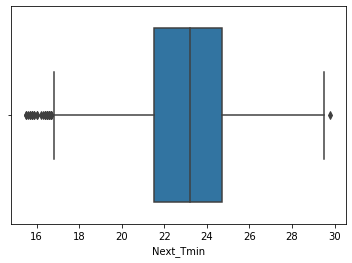

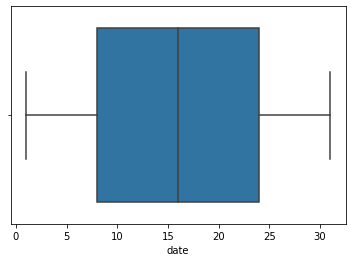

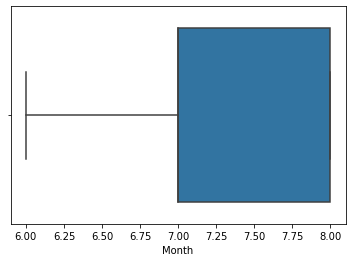

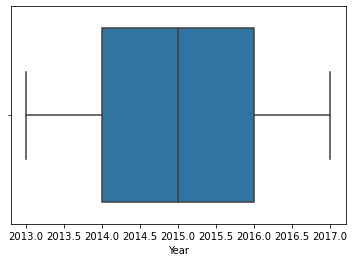

In [25]:
for  i in df_new.columns:
    plt.figure()
    sb.boxplot(df_new[i])

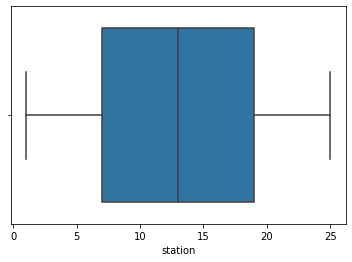

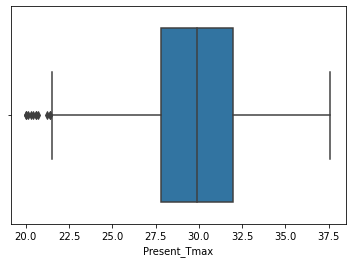

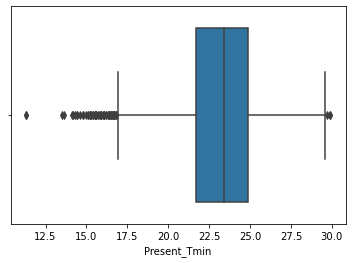

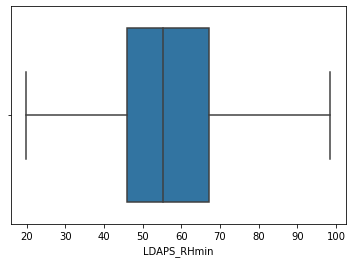

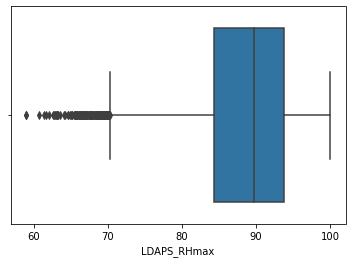

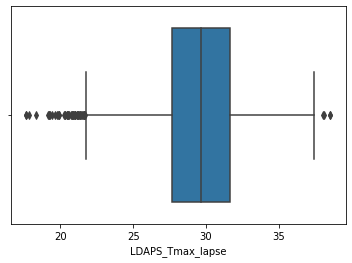

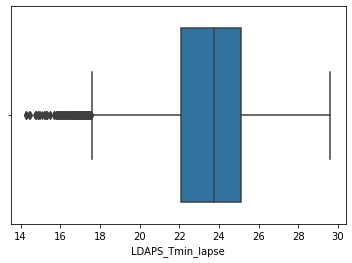

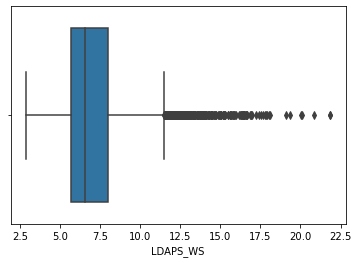

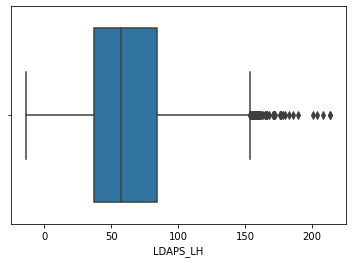

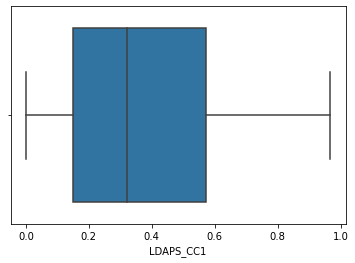

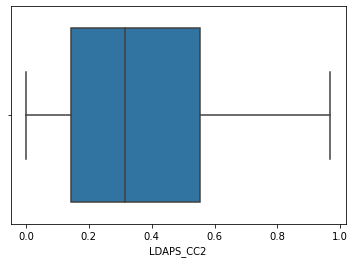

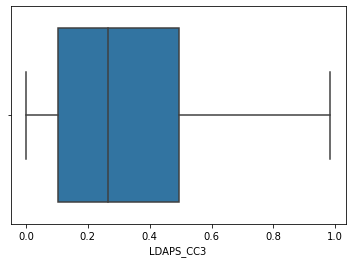

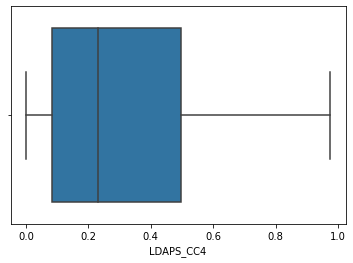

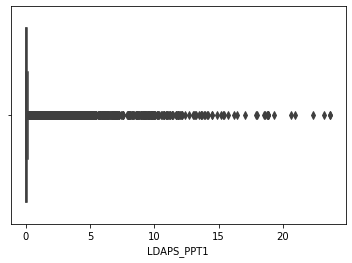

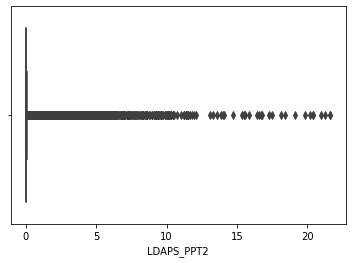

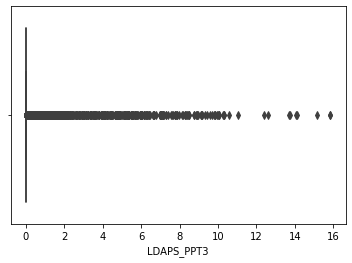

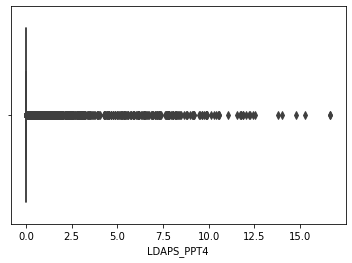

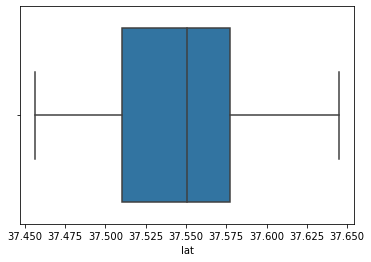

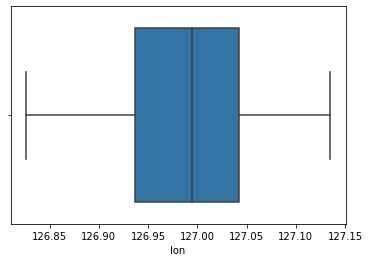

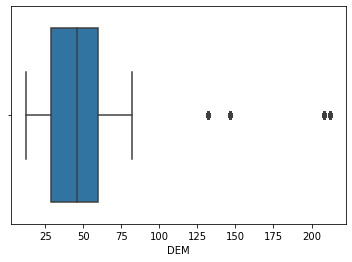

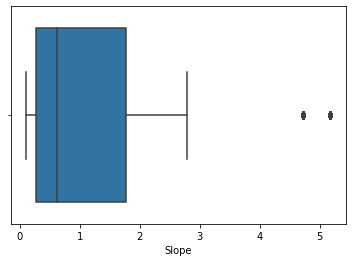

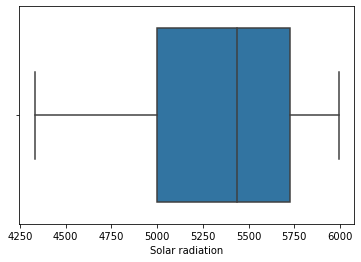

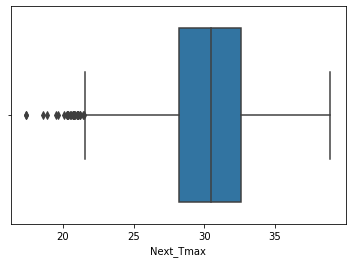

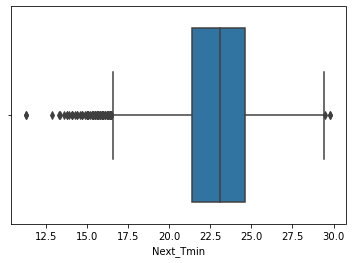

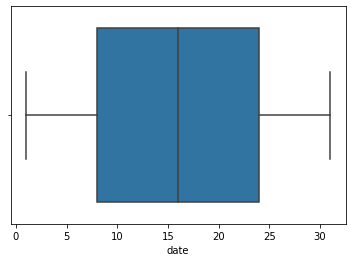

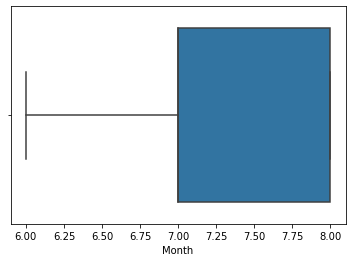

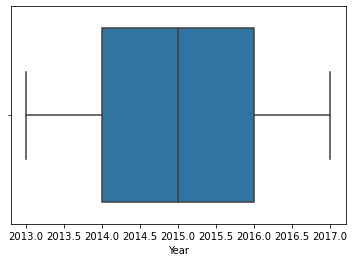

In [26]:
for  i in df.columns:
    plt.figure()
    sb.boxplot(df[i])

In [27]:
df_new.skew()

station             0.002792
Present_Tmax       -0.272653
Present_Tmin       -0.225479
LDAPS_RHmin         0.305740
LDAPS_RHmax        -0.688257
LDAPS_Tmax_lapse   -0.109372
LDAPS_Tmin_lapse   -0.382667
LDAPS_WS            1.087781
LDAPS_LH            0.568781
LDAPS_CC1           0.593990
LDAPS_CC2           0.500911
LDAPS_CC3           0.700217
LDAPS_CC4           0.710930
LDAPS_PPT1          3.731226
LDAPS_PPT2          4.843672
LDAPS_PPT3          5.482625
LDAPS_PPT4          5.927822
lat                 0.108251
lon                -0.275508
DEM                 1.764031
Slope               1.593600
Solar radiation    -0.505353
Next_Tmax          -0.270084
Next_Tmin          -0.237767
date                0.001007
Month              -0.192910
Year                0.010998
dtype: float64

<AxesSubplot:>

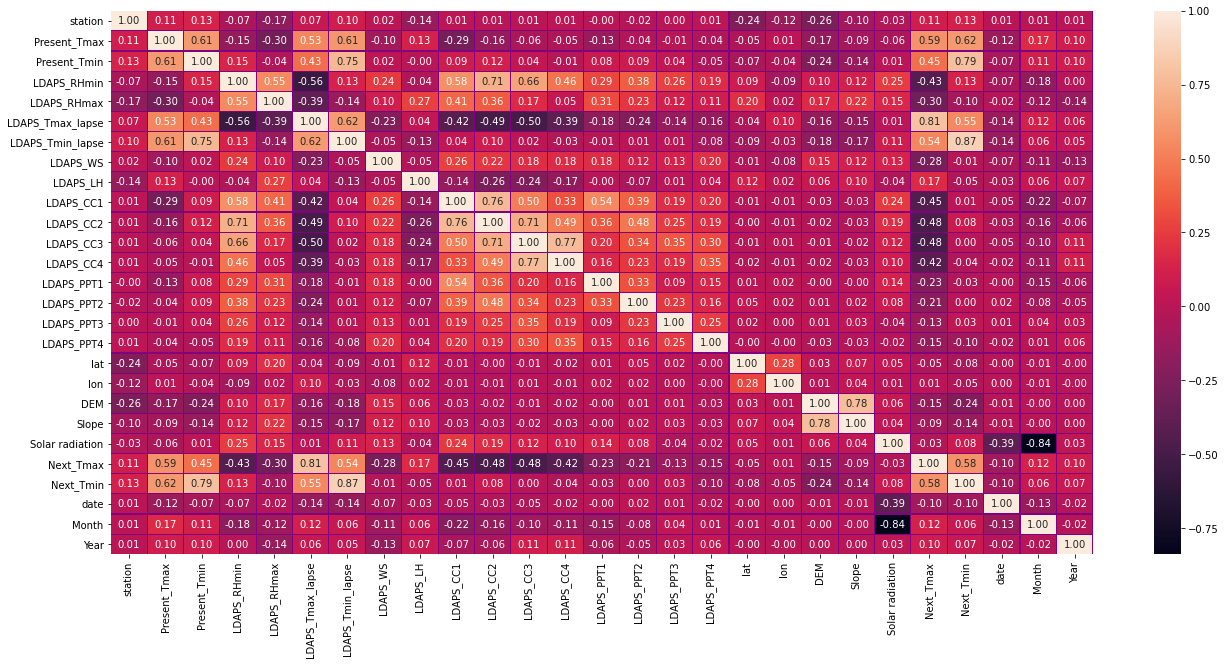

In [28]:
plt.figure(figsize=(22,10))
sb.heatmap(df_new.corr(),annot=True,linewidths=0.1,linecolor="purple",fmt="0.2f")

we need not to remove skewness since they have correlation with target variables

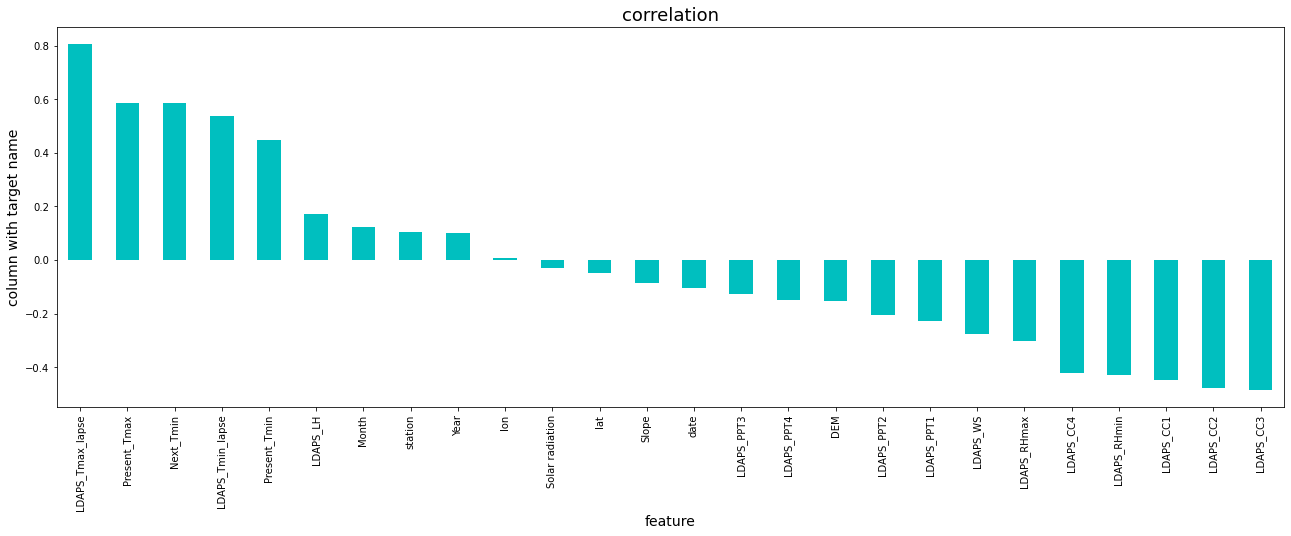

In [29]:
plt.figure(figsize=(22,7))
df_new.corr()["Next_Tmax"].sort_values(ascending=False).drop(["Next_Tmax"]).plot(kind="bar",color="c")
plt.xlabel("feature",fontsize=14)
plt.ylabel("column with target name",fontsize=14)
plt.title("correlation",fontsize=18)
plt.show()

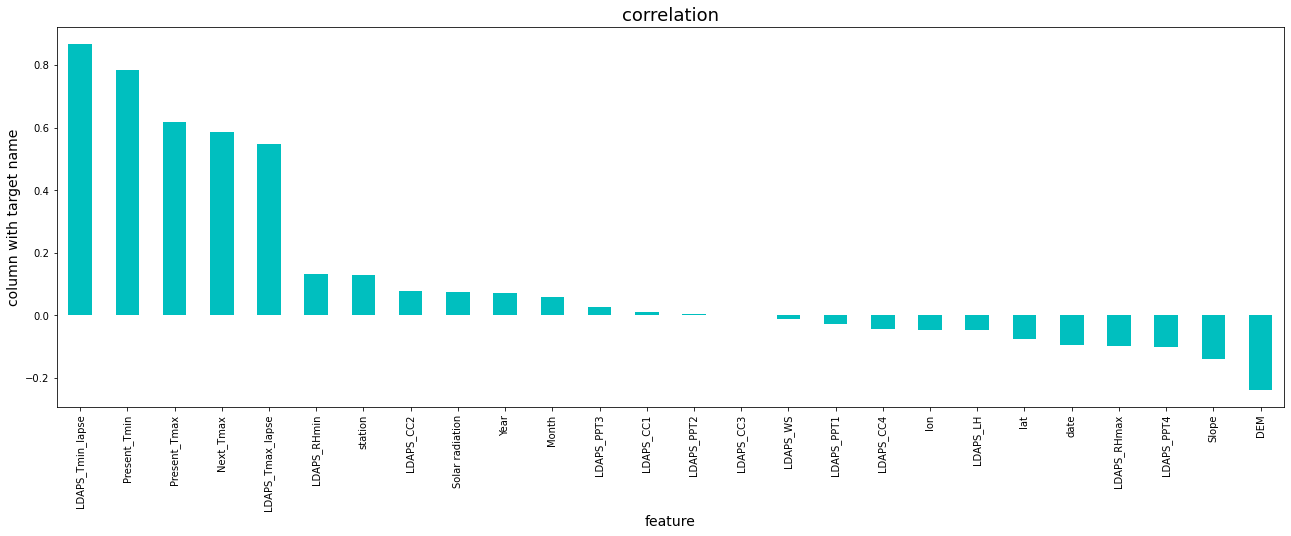

In [30]:
plt.figure(figsize=(22,7))
df_new.corr()["Next_Tmin"].sort_values(ascending=False).drop(["Next_Tmin"]).plot(kind="bar",color="c")
plt.xlabel("feature",fontsize=14)
plt.ylabel("column with target name",fontsize=14)
plt.title("correlation",fontsize=18)
plt.show()

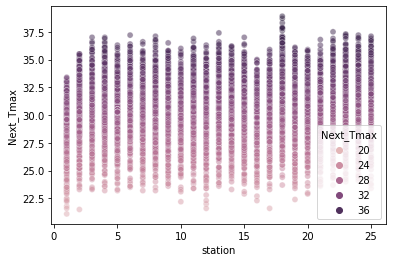

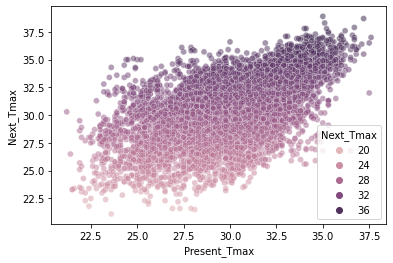

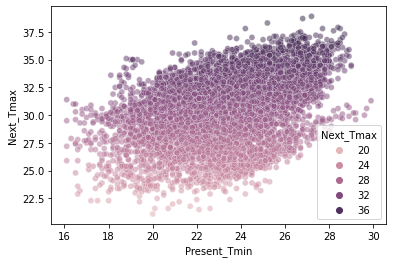

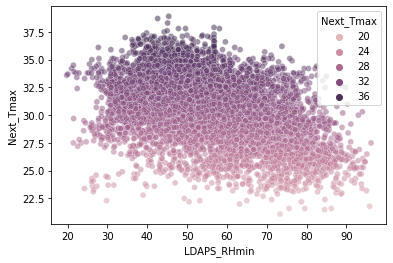

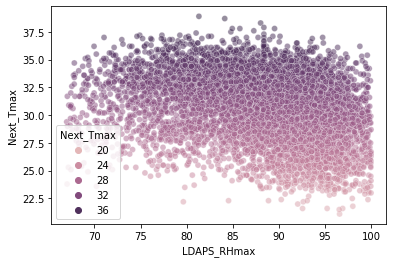

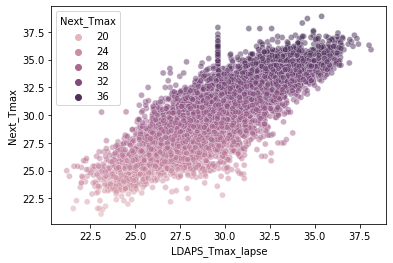

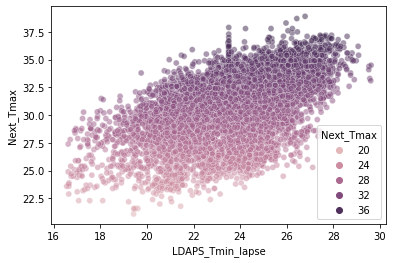

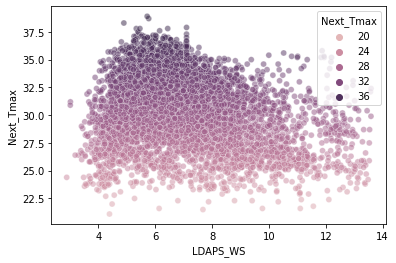

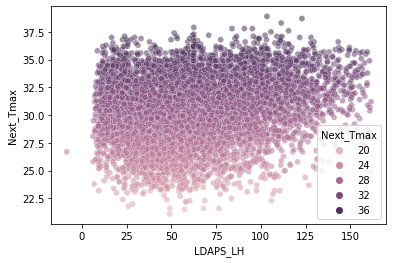

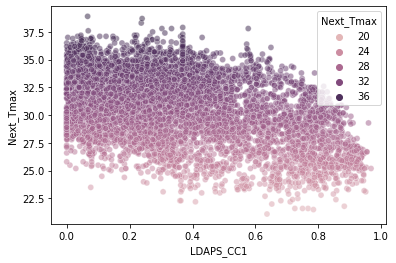

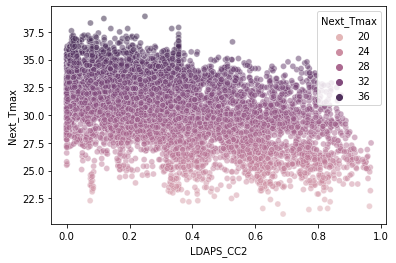

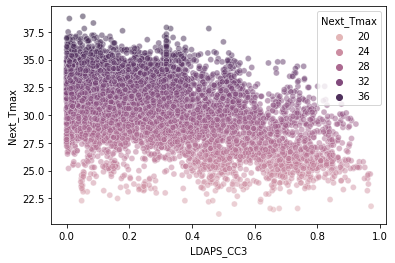

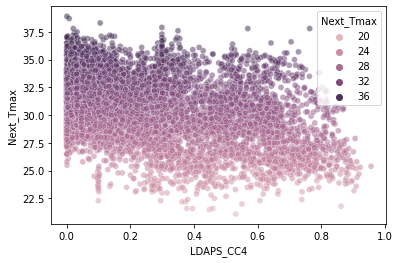

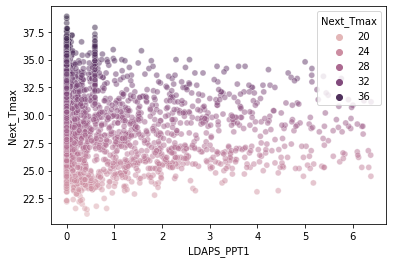

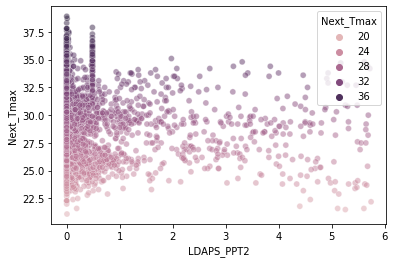

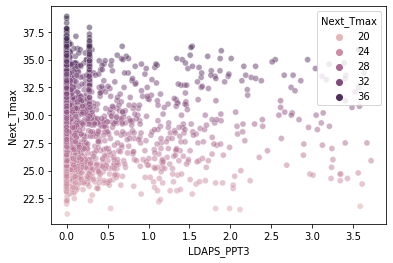

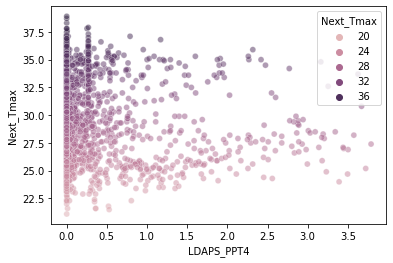

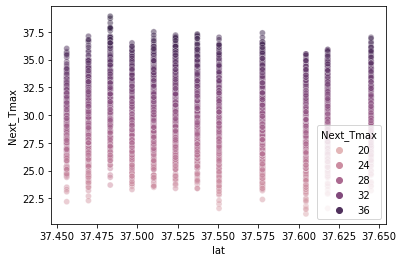

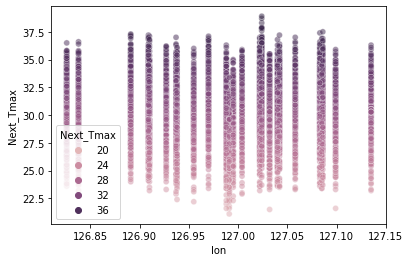

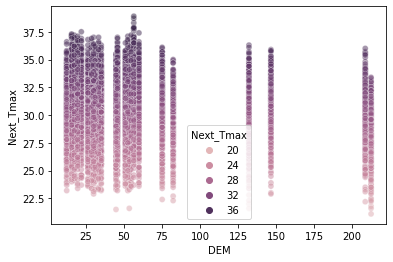

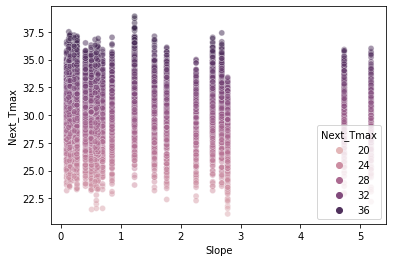

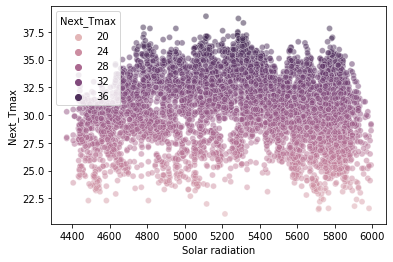

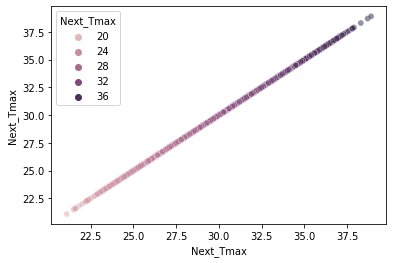

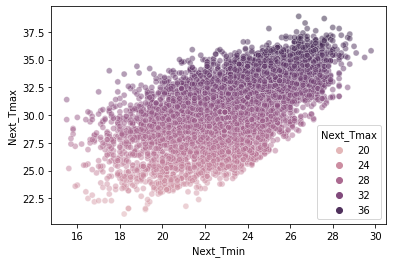

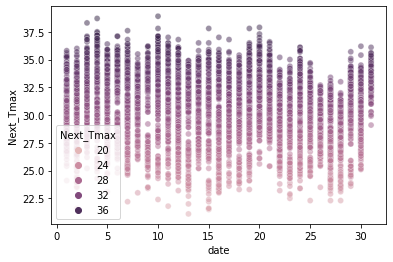

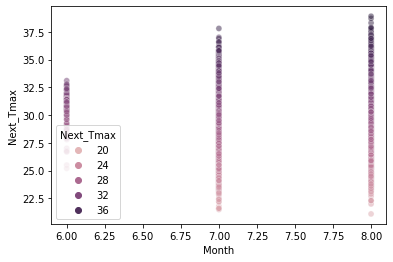

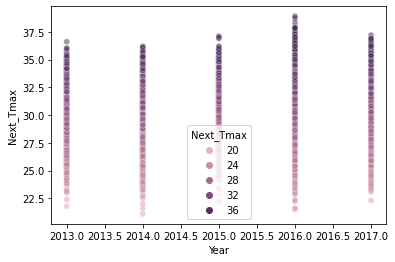

In [31]:

for  i in df_new.columns:
    plt.figure()
    sb.scatterplot(df_new[i],df_new["Next_Tmax"],alpha=0.5,c=(0,1,1),hue=df['Next_Tmax'])

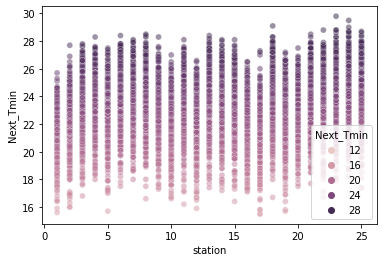

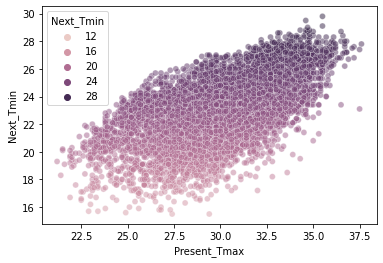

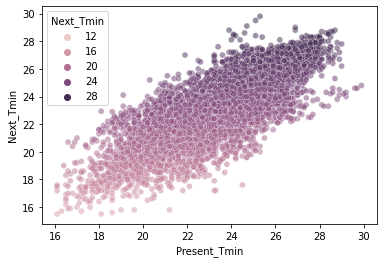

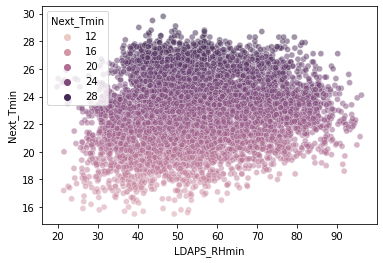

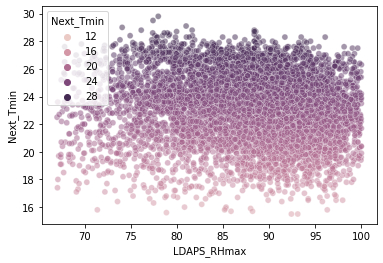

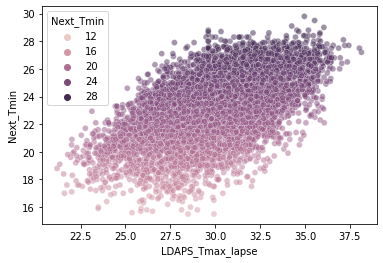

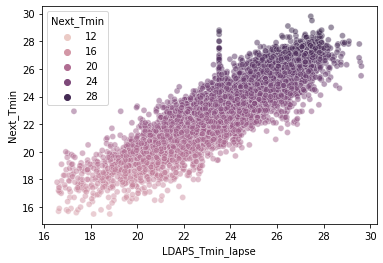

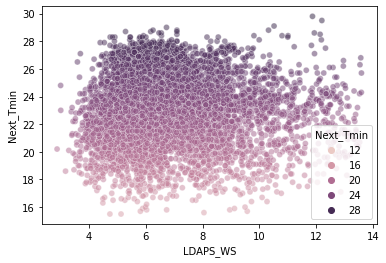

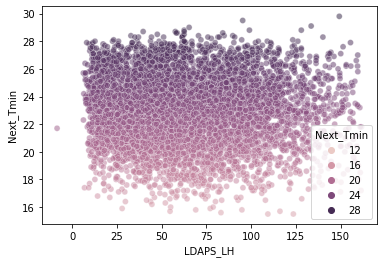

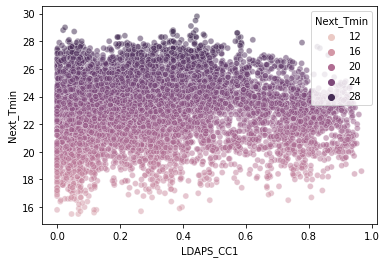

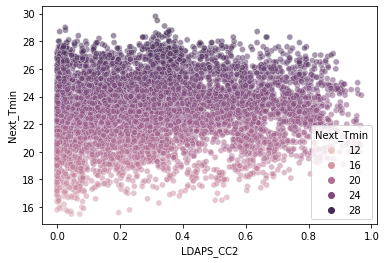

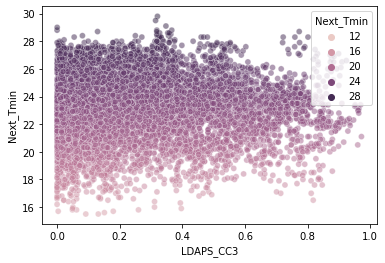

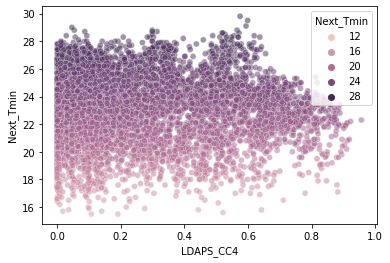

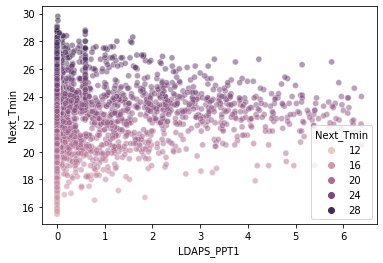

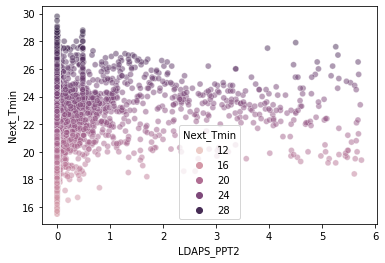

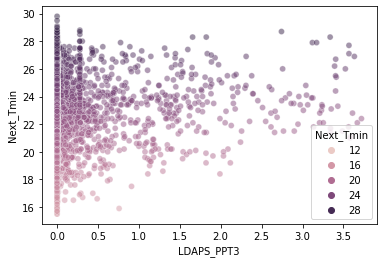

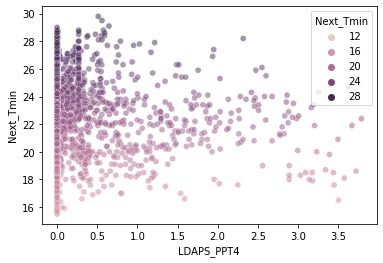

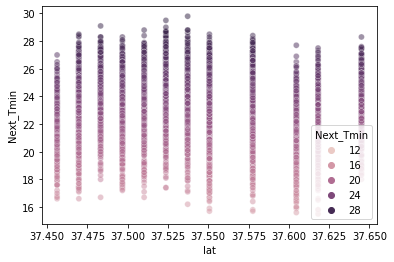

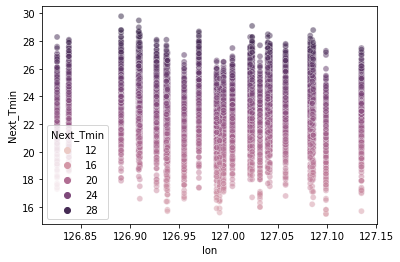

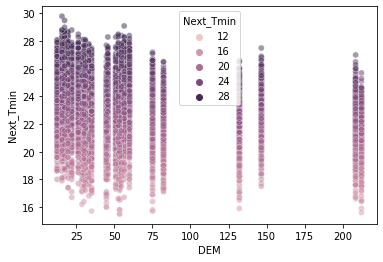

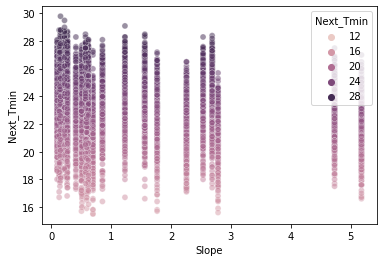

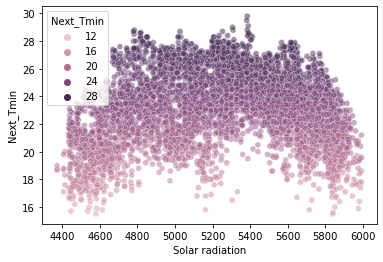

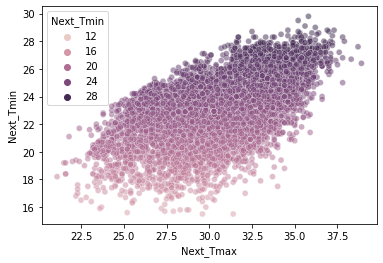

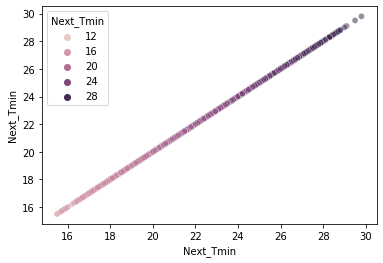

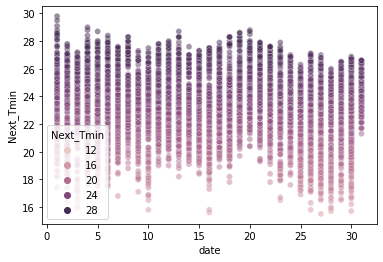

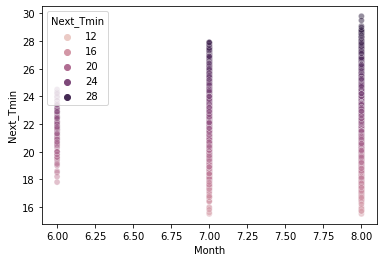

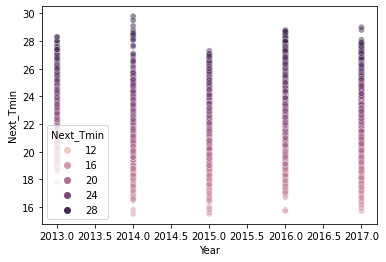

In [32]:
for  i in df_new.columns:
    plt.figure()
    sb.scatterplot(df_new[i],df_new["Next_Tmin"],alpha=0.5,c=(0,1,1),hue=df['Next_Tmin'])

This shows the relationships betwee the independant and target varaibles

In [33]:

y1=df_new["Next_Tmax"]
y2=df_new["Next_Tmin"]

In [35]:
x=df_new.drop("Next_Tmax",axis=1)

In [36]:
x=x.drop("Next_Tmin",axis=1)

In [37]:
x.shape

(6894, 25)

In [38]:
y1.shape

(6894,)

In [39]:
y2.shape

(6894,)

In [41]:

from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error,mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

In [91]:
lr=LinearRegression()
rfr=RandomForestRegressor()
dtr=DecisionTreeRegressor()
knr=KNeighborsRegressor()
svr=SVR()

Model for the 1st target 

In [62]:
maxAccu=0
maxRS=0
for i in range(1,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y1,test_size=0.20,random_state=i)
        lr.fit(x_train,y_train)
        pred=lr.predict(x_test)
        acc=r2_score(y_test,pred)
        if acc>maxAccu:
            maxAccu=acc
            maxRS=i
print("Best accuracy is",maxAccu,"On Random State", maxRS)


Best accuracy is 0.7729313441669029 On Random State 1


In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y1,test_size=0.2,random_state=1)
lr.fit(x_train,y_train)
pred_train=lr.predict(x_train)
pred_lr=lr.predict(x_test)
print(r2_score(y_test,pred_lr))

0.7729313441669029


In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y1,test_size=0.2,random_state=30)
rfr.fit(x_train,y_train)
pred_train=rfr.predict(x_train)
pred_rfr=rfr.predict(x_test)
print(r2_score(y_test,pred_rfr))

0.9045944184167076


In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y1,test_size=0.2,random_state=1)
dtr.fit(x_train,y_train)
pred_train=dtr.predict(x_train)
pred_dtr=dtr.predict(x_test)
print(r2_score(y_test,pred_dtr))

0.775341112114896


In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y1,test_size=0.2,random_state=51)
knr.fit(x_train,y_train)
pred_train=knr.predict(x_train)
pred_knr=knr.predict(x_test)
print(r2_score(y_test,pred_knr))

0.548195761352263


Hyperparameter tuning 

In [64]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


In [65]:
parameters={"criterion":["mse","mae"],"max_features":["auto","sqrt","log2"]}
rfr=RandomForestRegressor()
clf=GridSearchCV(rfr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'sqrt'}


In [124]:
sqrtrfr=RandomForestRegressor(criterion="mse",max_features="sqrt",random_state=30)
rfr.fit(x_train,y_train)
rfr.score(x_train,y_train)
pred_decision=rfr.predict(x_test)

rfs=r2_score(y_test,pred_decision)
print("R2 Score",rfs*100)

rfscore=cross_val_score(rfr,x,y1,cv=5)
rfr=rfscore.mean()  
print("Cross Val Score",rfc*100)

R2 Score 89.31053434471393
Cross Val Score 66.33078603107376


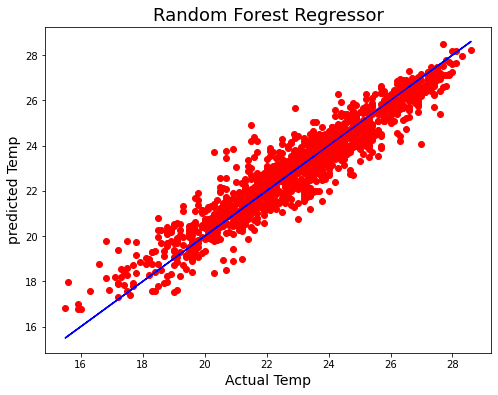

In [125]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_decision,color="r")
plt.plot(y_test,y_test,color="b")
plt.xlabel("Actual Temp",fontsize=14)
plt.ylabel("predicted Temp", fontsize=14)
plt.title("Random Forest Regressor",fontsize=18)
plt.show()

In [128]:
import pickle
filename="Tempmax.pkl"
pickle.dump(rfr,open(filename,"wb"))


Model for the 2nd target

In [102]:
maxAccu=0
maxRS=0
for i in range(1,100):
        x_train,x_test,y2_train,y2_test=train_test_split(x,y2,test_size=0.20,random_state=i)
        knr.fit(x_train,y_train)
        pred=knr.predict(x_test)
        acc=r2_score(y_test,pred)
        if acc>maxAccu:
            maxAccu=acc
            maxRS=i
print("Best accuracy is",maxAccu,"On Random State", maxRS)

Best accuracy is 0.5075423343658029 On Random State 99


In [108]:
x_train,x_test,y2_train,y2_test=train_test_split(x,y2,test_size=0.2,random_state=99)
lr.fit(x_train,y_train)
pred_train=lr.predict(x_train)
pred_lr=lr.predict(x_test)
print(r2_score(y_test,pred_lr))
print(r2_score(y_train,pred_train))

0.81985720365676
0.8174591475786048


In [106]:
x_train,x_test,y2_train,y2_test=train_test_split(x,y2,test_size=0.2,random_state=20)
rfr.fit(x_train,y_train)
pred_train=rfr.predict(x_train)
pred_rfr=rfr.predict(x_test)
print(r2_score(y_test,pred_rfr))
print(r2_score(y_train,pred_train))

-0.041740326291124896
0.8512071501213616


In [105]:
x_train,x_test,y2_train,y2_test=train_test_split(x,y2,test_size=0.2,random_state=99)
dtr.fit(x_train,y_train)
pred_train=dtr.predict(x_train)
pred_dtr=dtr.predict(x_test)
print(r2_score(y_test,pred_dtr))
print(r2_score(y_train,pred_train))

0.7666210917315632
1.0


In [104]:
x_train,x_test,y2_train,y2_test=train_test_split(x,y2,test_size=0.2,random_state=99)
knr.fit(x_train,y_train)
pred_train=knr.predict(x_train)
pred_knr=knr.predict(x_test)
print(r2_score(y_test,pred_knr))
print(r2_score(y_train,pred_train))

0.5075423343658029
0.6618600027290492


In [109]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso,Ridge

In [110]:
parameters={"alpha":[.0001,.001,.01,.1,1,10],"random_state":list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [111]:
ls=Lasso(alpha=0.0001,random_state=0)
ls.fit(x_train,y_train)
pred_ls=ls.predict(x_test)
lss=r2_score(y_test,pred_ls)
lss

0.8198104550379549

In [115]:
parameters={"alpha":[.0001,.001,.01,.1,1,10],"random_state":list(range(0,10))}
rd=Ridge()
clf=GridSearchCV(rd,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [118]:
rd=Ridge(alpha=1,random_state=0)
rd.fit(x_train,y_train)
pred_rd=rd.predict(x_test)
lss=r2_score(y_test,pred_rd)
lss

0.819766535268768

In [121]:
cv_score=cross_val_score(ls,x,y2,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.7612939840603812

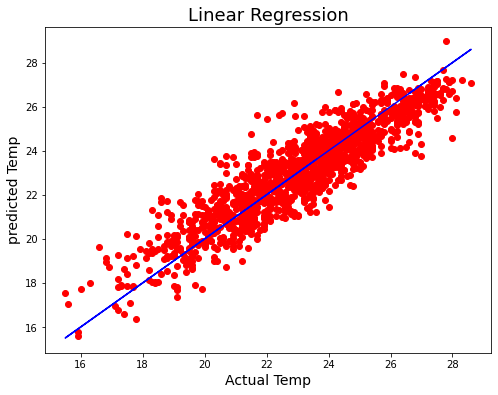

In [131]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_lr,color="r")
plt.plot(y_test,y_test,color="b")
plt.xlabel("Actual Temp",fontsize=14)
plt.ylabel("predicted Temp", fontsize=14)
plt.title("Linear Regression",fontsize=18)
plt.show()

In [132]:
import pickle
filename="Tempmin.pkl"
pickle.dump(lr,open(filename,"wb"))
